<a href="https://colab.research.google.com/github/thuyd12/Shapr_digital-marketing-analysis/blob/main/Shapr_Digital_marketing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 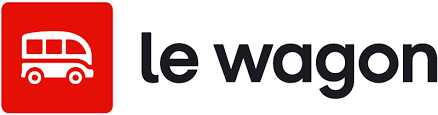


# Digital marketing analysis

#### **Load data**

a) Download and upload [`acquisition_facebook_adds.csv`](https://drive.google.com/file/d/1U4bXgai8KiEWLomvYqMAF-D-0zeKfU_l/view?usp=sharing) file in Google Colab. 

b) Load `acquisition_facebook_adds.csv` data in a DataFrame named `df_facebook`.

In [ ]:
import pandas as pd

df_facebook = pd.read_csv("acquisition_facebook_adds.csv")

#### **Data Discovery**

c) Print `df_facebook` DataFrame.

In [ ]:
df_facebook

,date,channel,spend
0,2019-08-01,Media,91.80
1,2019-08-01,Media,44.42
2,2019-08-01,Media,41.98
3,2019-08-01,Facebook,7.02
4,2019-08-01,Facebook,1.09
...,...,...,...
73626,2019-01-18,Media,59.66
73627,2019-01-18,Media,126.23
73628,2019-01-18,Media,10.82
73629,2019-01-18,Media,13.90


d) How many rows and columns are in this DataFrame ?

In [ ]:
df_facebook.shape

(73631, 3)

##### **Columns selection**

e) Select only `date` and `spend` columns of this DataFrame and save the result in a `df_facebook_date_spend` variable.

In [ ]:
cols = ["date", "spend"]

df_facebook_date_spend = df_facebook[cols]

##### **Filtering**

f) Filter the `df_facebook` DataFrame only on the **Media** channel and save the result in a `df_facebook_media` variable.

In [ ]:
mask = (df_facebook["channel"] == "Media")

df_facebook_media = df_facebook[mask]

g) Filter the `df_facebook` DataFrame only on Instagram channel the `2019-01-13`. 

Save the result in a variable `df_facebook_instagram_20190113`.

We will save `df_facebook_instagram_20190113` to a csv file `acquisition_facebook_instagram_20190113.csv`.


In [ ]:
mask = (df_facebook["channel"] == "Instagram") & (df_facebook["date"] == "2019-01-13")

df_facebook_instagram_20190113 = df_facebook[mask]

df_facebook_instagram_20190113.to_csv("acquisition_facebook_instagram_20190113.csv")

#### **Data Analysis**

###### **Cast a date column to datetime**

h) Convert the `date` column of the `df_facebook` DataFrame to datetime (a Python type for dates). 

We'll use the `pd.to_datetime()` function to do this. 

Have a look at the syntax in the course. Which **format** should you use here?

In [ ]:
df_facebook["date"] = pd.to_datetime(df_facebook["date"], format="%Y-%m-%d")

##### **Aggregate functions**

i) Over what time period does the data extend? 

You can use the `.min()` and `.max()` aggregation functions on the `date` column

In [ ]:
print(df_facebook["date"].min())
print(df_facebook["date"].max())

2019-01-01 00:00:00
2019-10-18 00:00:00


j) Over the whole period, how much did Shapr spend? 

We can use the aggregation function `.sum()` on the `spend` column.

In [ ]:
df_facebook["spend"].sum()

1811170.169857

k) Calculate the amount of money spent by Shapr day by day. 

To do this we will use the `.groupby()` function and then the `.sum()` aggregation function on the `spend` column.

We will store the result in a `df_facebook_daily` variable. Look at the syntax in the course colab. 

**Use the argument as_index=False to get a DataFrame as result**.

In [ ]:
cols_to_group_on = ["date"]

df_facebook_daily = df_facebook.groupby(cols_to_group_on, as_index=False)["spend"].sum()

df_facebook_daily

,date,spend
0,2019-01-01,4082.340000
1,2019-01-02,4737.440000
2,2019-01-03,5838.160000
3,2019-01-04,7793.200000
4,2019-01-05,8572.060000
...,...,...
286,2019-10-14,274.900000
287,2019-10-15,285.210008
288,2019-10-16,310.230002
289,2019-10-17,297.490002


m) We would like to extend the analysis by looking at the marketing spend strategy by channel over time. 

Calculate the amount spent per day per channel. We will store the result in a variable `df_facebook_channel_daily`.

**Use the argument as_index=False again to get a DataFrame as a result.

In [ ]:
cols_to_group_on = ["date", "channel"]

df_facebook_channel_daily = df_facebook.groupby(cols_to_group_on, as_index=False)["spend"].sum()

df_facebook_channel_daily

,date,channel,spend
0,2019-01-01,Facebook,706.210000
1,2019-01-01,Instagram,1406.140000
2,2019-01-01,Media,1969.990000
3,2019-01-02,Facebook,860.150000
4,2019-01-02,Instagram,1524.340000
...,...,...,...
868,2019-10-17,Instagram,146.470000
869,2019-10-17,Media,48.170002
870,2019-10-18,Facebook,15.930000
871,2019-10-18,Instagram,28.870000


n) We want to display these values in a graph.

Execute the code below to achieve this (we will have a specific lecture on visualisations in Python later in the bootcamp)

Comment Shaphr investments.

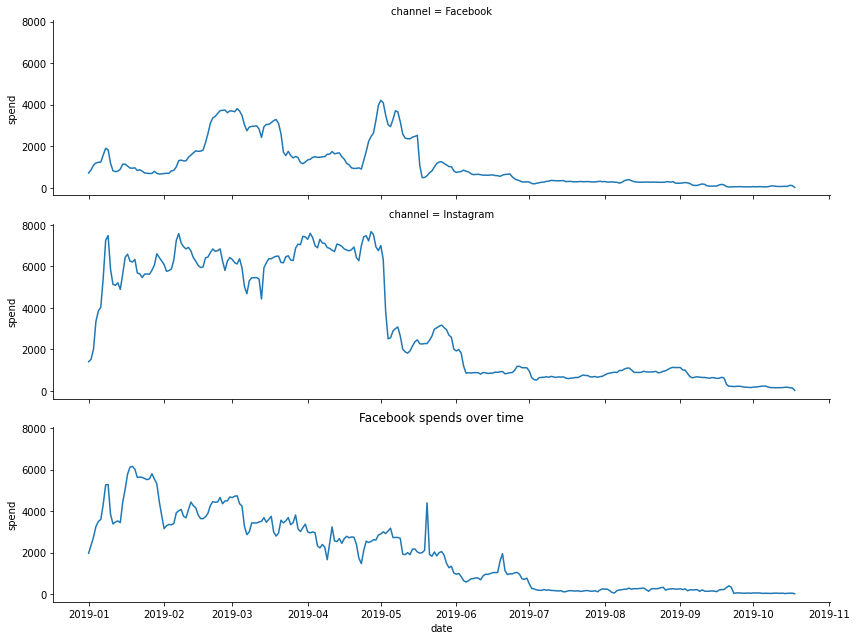

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(kind="line", 
            data=df_facebook_channel_daily, 
            x="date", 
            y="spend", 
            row="channel",
            height=3,
            aspect=12/3)
plt.xlabel("date")
plt.ylabel("spend")
plt.title("Facebook spends over time")
plt.show()

Overall: strong investments at the beginning of the year and then almost cut off

- Facebook: reduced investment compared to other media except for two tests around March and May.
- Instagram: very strong and constant investment until June.
- Media: decreasing investment until July

Note that there was a peak in investment in May on the Media channel.

#### **Data Wrangling**

##### **Join two dataframes**

o) Load the file [`social_network_taxes.csv`](https://drive.google.com/file/d/1Lleeq3STLbX_wL6j6jNwlFt5eJRrIrAF/view?usp=sharing) into a `df_taxes` DataFrame and display it. 

This represents the fee applied by each of the social networks as a service charge  (not real numbers). I.e. for a fee of 0.10, if you invest 100 (spend=100), the social network takes 10 as service fees.

In [ ]:
df_taxes = pd.read_csv("social_network_taxes.csv")

df_taxes

,channel,tax
0,Instagram,0.20
1,Facebook,0.15
2,Media,0.10


p) Join two DataFrames `df_facebook` and `df_taxes` and store the result in a variable `df_facebook`.

Display `df_facebook` DataFrame, which new column has just appeared?

Look at the syntax in your course.

In [ ]:
df_facebook = pd.merge(df_facebook, df_taxes, on="channel", how="left")

df_facebook

,date,channel,spend,tax
0,2019-08-01,Media,91.80,0.10
1,2019-08-01,Media,44.42,0.10
2,2019-08-01,Media,41.98,0.10
3,2019-08-01,Facebook,7.02,0.15
4,2019-08-01,Facebook,1.09,0.15
...,...,...,...,...
73626,2019-01-18,Media,59.66,0.10
73627,2019-01-18,Media,126.23,0.10
73628,2019-01-18,Media,10.82,0.10
73629,2019-01-18,Media,13.90,0.10


Column `tax` has been added to the DataFrame. 

q) Create a new column in `df_facebook` that corresponds to the spend column minus the service charge.

We'll call this column `real_spend`.

Hint: You can think of the columns in a DataFrame as variables for doing arithmetic operations.

In [ ]:
# df_facebook["real_spend"] = (1 - df_facebook["tax"]) * df_facebook["spend"]
df_facebook["real_spend"] = df_facebook["spend"] - df_facebook["spend"] * df_facebook["tax"]

df_facebook

,date,channel,spend,tax,real_spend
0,2019-08-01,Media,91.80,0.10,82.6200
1,2019-08-01,Media,44.42,0.10,39.9780
2,2019-08-01,Media,41.98,0.10,37.7820
3,2019-08-01,Facebook,7.02,0.15,5.9670
4,2019-08-01,Facebook,1.09,0.15,0.9265
...,...,...,...,...,...
73626,2019-01-18,Media,59.66,0.10,53.6940
73627,2019-01-18,Media,126.23,0.10,113.6070
73628,2019-01-18,Media,10.82,0.10,9.7380
73629,2019-01-18,Media,13.90,0.10,12.5100


##### **Create a pivot table**

r) Make a pivot table with date as an index, channels as columns and real_spend as values.

Choose `sum` function for aggregate function.

We will store the result in a variable `df_facebook_pivot`.

Refer to your course for the correct syntax.

**Don't forget to apply the `.reset_index()` function to recreate an index**.


In [ ]:
data = df_facebook
values = "real_spend"
index = ["date"]
columns = ["channel"]
aggfunc = "sum"

df_facebook_pivot = pd.pivot_table(data, values, index, columns, aggfunc).reset_index()

df_facebook_pivot

channel,date,Facebook,Instagram,Media
0,2019-01-01,600.278500,1124.912,1772.991000
1,2019-01-02,731.127500,1219.472,2117.655000
2,2019-01-03,920.575500,1610.480,2467.827000
3,2019-01-04,1010.692500,2678.864,2930.013000
4,2019-01-05,1040.842000,3077.824,3150.234000
...,...,...,...,...
286,2019-10-14,57.349500,142.392,26.496000
287,2019-10-15,54.578503,143.152,37.854004
288,2019-10-16,96.985000,122.032,39.231002
289,2019-10-17,87.422500,117.176,43.353002


s) Save the values in a csv file `df_facebook_pivot.csv`.

In [ ]:
df_facebook_pivot.to_csv("df_facebook_pivot.csv")

u) [Bonus] Are there multiple rows in  `df_facebook` for a same day and channel? If so, count the number of days for which this is the case per channel.

In [ ]:
(df_facebook.groupby(["date", "channel"]).size() > 1).groupby("channel").sum()


channel
Facebook     291
Instagram    291
Media        265
dtype: int64